In [1]:
import numpy as np
import skimage as skm
import matplotlib.pyplot as plt
from skimage import io
import pandas as pd
import datetime

In [2]:
image_collection = io.imread_collection('E:/TSA/Ardabil_Snow/*.tif')

In [4]:
print(np.shape(image_collection))

(1544, 41, 43)


In [5]:
print(np.size(image_collection))

2722072


In [6]:
all_images = io.concatenate_images(image_collection)

In [7]:
data = all_images.reshape(all_images.shape[0], -1)

In [8]:
print(np.shape(data))

(1544, 1763)


In [9]:
arr = np.array(image_collection)

In [10]:
stack = np.stack([arr[500], arr[900], arr[1400]], axis=2)

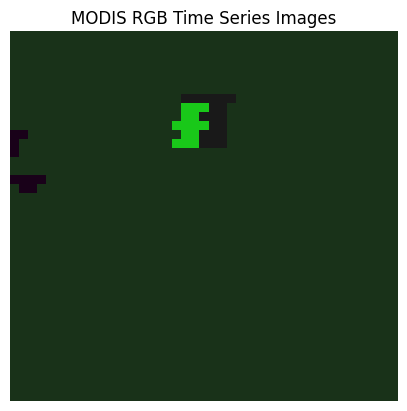

In [11]:
plt.figure()
plt.imshow(stack)
plt.title('MODIS RGB Time Series Images')
plt.axis('off')
plt.show()

In [12]:
nums = np.count_nonzero(data == 200, axis=1)

In [14]:
print('Count NoN-Zero : ', nums)

Count NoN-Zero :  [0 0 0 ... 0 0 0]


In [16]:
dates = [i.split('doy')[1].split('_')[0] for i in image_collection.files]

In [17]:
print(dates)

['2010001', '2010002', '2010003', '2010004', '2010005', '2010006', '2010007', '2010008', '2010009', '2010010', '2010011', '2010012', '2010013', '2010014', '2010015', '2010016', '2010017', '2010018', '2010019', '2010020', '2010021', '2010022', '2010023', '2010024', '2010025', '2010026', '2010027', '2010028', '2010029', '2010030', '2010031', '2010032', '2010033', '2010034', '2010035', '2010036', '2010037', '2010038', '2010039', '2010040', '2010041', '2010042', '2010043', '2010044', '2010045', '2010046', '2010047', '2010048', '2010049', '2010050', '2010051', '2010052', '2010053', '2010054', '2010055', '2010056', '2010057', '2010058', '2010059', '2010060', '2010061', '2010062', '2010063', '2010064', '2010065', '2010066', '2010067', '2010068', '2010069', '2010070', '2010071', '2010072', '2010073', '2010074', '2010075', '2010076', '2010077', '2010078', '2010079', '2010080', '2010081', '2010082', '2010083', '2010084', '2010085', '2010086', '2010087', '2010088', '2010089', '2010090', '2010091'

In [18]:
df = pd.DataFrame()

In [19]:
df['values(Km^2)'] = nums * 0.5 * 0.5
df['date'] = dates

In [20]:
print(df)

      values(Km^2)     date
0              0.0  2010001
1              0.0  2010002
2              0.0  2010003
3              0.0  2010004
4              0.0  2010005
...            ...      ...
1539           0.0  2014079
1540           0.0  2014080
1541           0.0  2014081
1542           0.0  2014082
1543           0.0  2014083

[1544 rows x 2 columns]


In [21]:
del image_collection, all_images, data, nums, dates

In [22]:
def convert(date):
    new_date = datetime.datetime.strptime(str(date), '%Y%j')
    return new_date

In [23]:
print(df.head(10))

   values(Km^2)     date
0          0.00  2010001
1          0.00  2010002
2          0.00  2010003
3          0.00  2010004
4          0.00  2010005
5          0.00  2010006
6        377.50  2010007
7        412.00  2010008
8          0.00  2010009
9        228.75  2010010


In [24]:
df['date'] = df['date'].apply(convert)
print(df.head(10))

   values(Km^2)       date
0          0.00 2010-01-01
1          0.00 2010-01-02
2          0.00 2010-01-03
3          0.00 2010-01-04
4          0.00 2010-01-05
5          0.00 2010-01-06
6        377.50 2010-01-07
7        412.00 2010-01-08
8          0.00 2010-01-09
9        228.75 2010-01-10


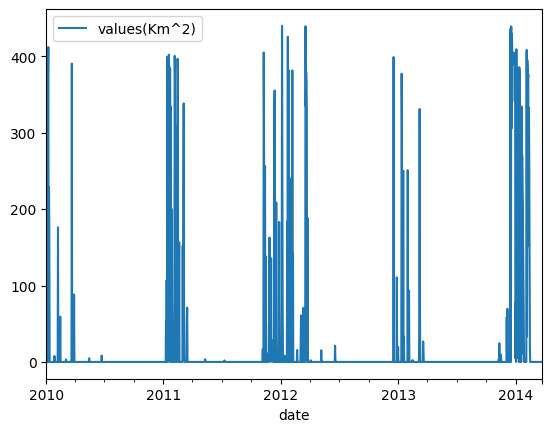

In [25]:
df.plot(x='date', y='values(Km^2)')
plt.show()

In [26]:
df.to_csv('E:/TSA/Ardabil_Snow/TimeSeries_Snow.csv')